# Analysis of Fandango's rating system

<b>What the project is about:</b> 

There's a significant discrepancy between the number of stars displayed to users and the actual rating.

<b>What your goal is in this project:</b>  

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

<b>
Read in and explore briefly the two data sets (fandango_score_comparison.csv and movie_ratings_16_17.csv) to understand their structure. You can find the documentation of both data sets in the GitHub repositories we linked to above.

In [1]:
import pandas as pd

previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
previous.shape

(146, 22)

In [3]:
previous.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
after.shape

(214, 15)

In [5]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


<b>

Isolate the columns that offer information about Fandango's ratings in separate variables so we have just the data we're interested in more readily available for later use.

* For the data set with ratings previous to Hickey's analysis, select the following columns: 'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'.

* For the other data set, select the the following columns: 'movie', 'year', 'fandango'.

In [6]:
fandango_previous = previous[[
    'FILM', 
    'Fandango_Stars',
    'Fandango_Ratingvalue', 
    'Fandango_votes',
    'Fandango_Difference'
]].copy()

In [7]:
fandango_after = after[[
    'movie',
    'year',
    'fandango'
]].copy()

<b>
Define the population of interest for our goal — remember that our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis.


Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

<b>
Check if both samples contain popular movies — that is, check whether all (or at least most) sample points are movies with over 30 fan ratings on Fandango's website.

In [8]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [9]:
len(fandango_previous[fandango_previous['Fandango_votes'] < 30])

0

Isolate the movies released in 2015 in a separate data set (from fandango_previous)

In [10]:
print(fandango_previous.head())

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  


In [11]:
fandango_previous['year'] = fandango_previous['FILM'].str[-5:-1]
print(fandango_previous['year'].value_counts())

2015    129
2014     17
Name: year, dtype: int64


In [12]:
fandango_2015 = fandango_previous[fandango_previous['year'] == '2015'].copy()

In [13]:
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [14]:
fandango_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

In [15]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [16]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [17]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()

In [18]:
fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


In [19]:
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

<b>
Our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

Generate two kernel density plots on the same figure for the distribution of movie ratings of each sample. Customize the graph such that:
* It has a title with an increased font size.
* It has labels for both the x and y-axis.
* It has a legend which explains which distribution is for 2015 and which is for 2016.
* The x-axis starts at 0 and ends at 5 because movie ratings on Fandango start at 0 and end at 5.
* The tick labels of the x-axis are: [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0].
* It has the fivethirtyeight style (this is optional). You can change to this style by using plt.style.use('fivethirtyeight'). This line of code must be placed before the code that generates the kernel density plots.

In [20]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

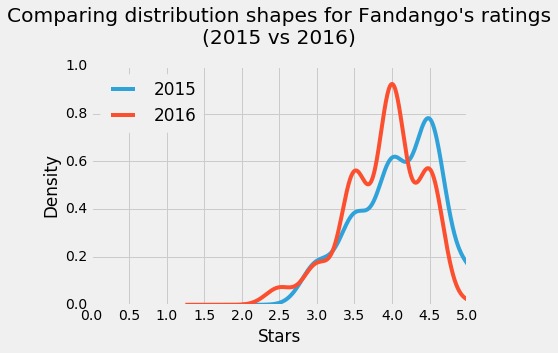

In [21]:
plt.style.use('fivethirtyeight') #le da el estilo de fivethirtyeight

fandango_2015['Fandango_Stars'].plot.kde(
    label = '2015', 
    legend=True
)
fandango_2016['fandango'].plot.kde(
    label  = '2016',
    legend=True
)
plt.title(
    "Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)", 
    y = 1.07 # para darle mayor tamaño
)
plt.xlabel('Stars')
plt.xlim(0, 5) #The x-axis starts at 0 and ends at 5 because movie ratings on Fandango start at 0 and end at 5.
plt.xticks(arange(0, 5.1, .5))
plt.show()

<b>What is the shape of each distribution?</b>

Skeweb to the right. 2016 sharpened than 2015.


Parece haber un redondeo de los votos situados entre 3.5 y 4 hacia 4 y un redondeo de los votos de entre 4 y 4.5 hacia 5. Los votos de 2016 son menores que los de 2015.

<b>
Examine the frequency distribution tables of the two distributions.

* The samples have different number of movies. Does it make sense to compare the two tables using absolute frequencies?

* If absolute frequencies are not useful here, would relative frequencies be of more help? If so, what would be better for readability — proportions or percentages?

In [22]:
print("2015")
fandango_2015['Fandango_Stars'].value_counts(
    normalize=True).sort_index() * 100

2015


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [23]:
print("2016")
fandango_2016['fandango'].value_counts(
    normalize=True).sort_index() * 100

2016


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [24]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
print(summary)

            2015      2016
mean    4.085271  3.887435
median  4.000000  4.000000
mode    4.500000  4.000000


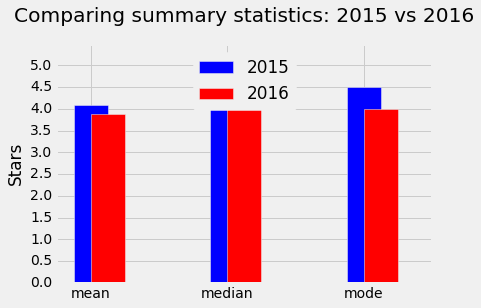

In [48]:
plt.style.use('fivethirtyeight')

summary['2015'].plot.bar(
    color='blue', 
    align='center', 
    label='2015', 
    legend=True,
    width= .25,
    rot=0
)
summary['2016'].plot.bar(
    color='red', 
    align='edge', 
    label='2016', 
    legend=True,
    rot=0,
    width= .25
)

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(loc = 'upper center')
plt.show()